In [ ]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.9 MB/s eta 0:00:00
time: 453 µs (started: 2023-05-27 09:47:06 +00:00)


In [ ]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from typing import List, Tuple

time: 182 ms (started: 2023-05-27 09:47:06 +00:00)


***Sample Generation***

In [ ]:
def generate_random_graph(n: int, m: int) -> Tuple[List[int], List[Tuple[int, int]]]:
    V = list(range(1, n+1))
    E = []
    while len(E) < m:
        u, v = random.sample(V, 2)
        if (u, v) not in E and (v, u) not in E:
            E.append((u, v))
    return V, E

time: 945 µs (started: 2023-05-27 09:47:06 +00:00)


***Brute Force Algorithm***

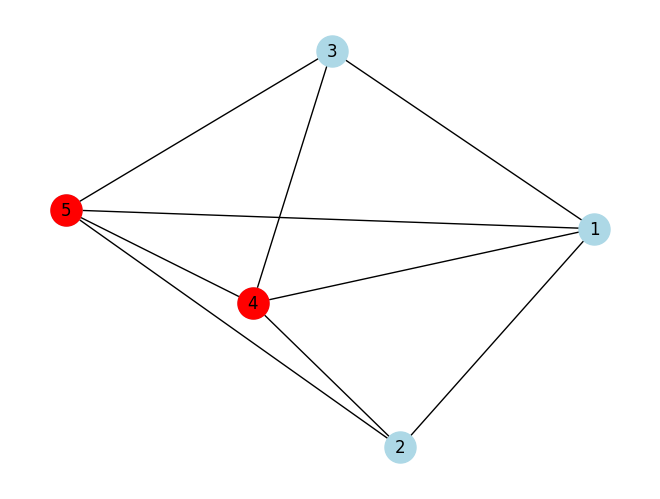

time: 252 ms (started: 2023-05-27 09:47:06 +00:00)


In [ ]:

def BruteForceDominatingSet(V, E):
    def subsets(s):
        if not s:
            return [[]]
        x = subsets(s[1:])
        return x + [[s[0]] + y for y in x]

    minDS = V
    for S in subsets(V):
        for v in V:
            if v not in S and all(u not in S for u in E[v]):
                break
        else:
            if len(S) < len(minDS):
                minDS = S
    return minDS

# Generate random graph
V, E = generate_random_graph(5, 9)

# Find minimum dominating set
minDS = BruteForceDominatingSet(V, E)

# Visualize graph
G = nx.Graph()
G.add_nodes_from(V)
G.add_edges_from(E)
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size=500, node_color='lightblue', with_labels=True)
nx.draw_networkx_nodes(G, pos, nodelist=minDS, node_color='r', node_size=500)
plt.show()

***Heuristic Algorithm***

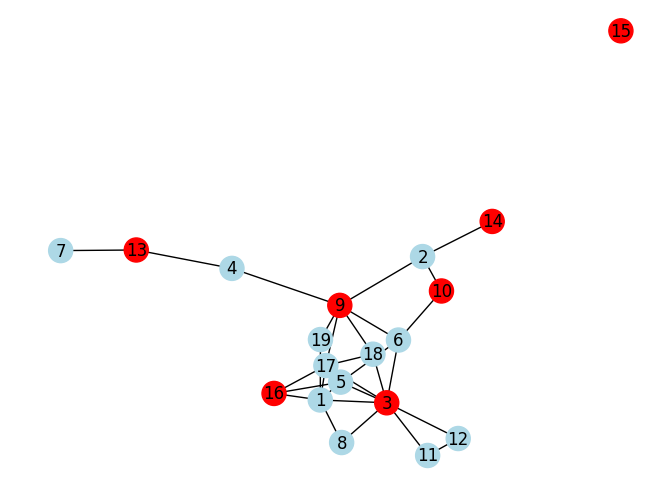

time: 182 ms (started: 2023-05-27 09:47:06 +00:00)


In [ ]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from typing import List, Tuple

def greedyDS(V: List[int], E: List[Tuple[int, int]]) -> List[int]:
    G = nx.Graph()
    G.add_nodes_from(V)
    G.add_edges_from(E)

    dominating_set = []
    undominated_nodes = set(V)

    while undominated_nodes:
        node = max(undominated_nodes, key=lambda n: len(set(G.neighbors(n)) - set(dominating_set)))
        dominating_set.append(node)
        undominated_nodes.remove(node)
        undominated_nodes -= set(G.neighbors(node))

    return dominating_set

def visual_DS(V: List[int], E: List[Tuple[int, int]], dominating_set: List[int]):
    G = nx.Graph()
    G.add_nodes_from(V)
    G.add_edges_from(E)

    node_colors = ['r' if node in dominating_set else 'lightblue' for node in V]

    pos = nx.spring_layout(G)

    nx.draw(G, pos, with_labels=True, node_color=node_colors)
    plt.show()

n = 19  # Number of nodes
m = 30  # Number of edges

V, E = generate_random_graph(n, m)
dominating_set = greedyDS(V, E)
visual_DS(V, E, dominating_set)



# **Algorithm Comparison Section**

In [ ]:
import time

def print_table():
    # Print the table heading
    print("{:<15s}{:<15s}{:<15s}".format("# Iteration", "Brute Force", "Greedy"))

    n = 6  # Number of nodes
    m = 9  # Number of edges

    bf_Data = 0
    greedy_Data = 0

    total_time_BF = 0.0
    total_time_G = 0.0
    z = 50
    for j in range(z):

        V, E = generate_random_graph(n, m)

        # Measure the execution time for BruteForceDominatingSet
        start_time_BF = time.time()
        dominating_setBF = BruteForceDominatingSet(V, E)
        end_time_BF = time.time()
        elapsed_time_BF = end_time_BF - start_time_BF
        total_time_BF += elapsed_time_BF

        # Measure the execution time for greedyDS
        start_time_G = time.time()
        dominating_setG = greedyDS(V, E)
        end_time_G = time.time()
        elapsed_time_G = end_time_G - start_time_G
        total_time_G += elapsed_time_G

        # Calculate the average time
        average_time_BF = total_time_BF /(j+1)
        average_time_G = total_time_G /  (j+1)

        if j % 3 == 0:
            n = n + 1
            m = m + 1

        # Convert integer data to strings
        data1 = str(j)
        data2 = str(len(dominating_setBF))
        data3 = str(len(dominating_setG))

        # Print the row
        print("{:<15s}{:<15s}{:<15s}".format(data1, data2, data3))
        bf_Data = bf_Data + len(dominating_setBF)
        greedy_Data = greedy_Data + len(dominating_setG)
        #Print the average times
        if j == z-1:
          print("Average time for BruteForceDominatingSet: {} seconds".format(average_time_BF))
          print("Average time for greedyDS: {} seconds".format(average_time_G))
          print("Average time BruteForce/Greedy Ratio: ", average_time_BF/average_time_G)
          print("Brute Force Total DS Nodes:" , bf_Data)
          print("Greedy Total DS Nodes:" , greedy_Data)
          print("The Ratio of Greedy Total DS Nodes / Brute Force Total DS Nodes:",(greedy_Data/bf_Data))
print_table()


# Iteration    Brute Force    Greedy         
0              2              1              
1              3              2              
2              3              2              
3              3              2              
4              3              3              
5              2              3              
6              3              3              
7              3              3              
8              3              3              
9              4              4              
10             3              3              
11             4              4              
12             3              3              
13             4              5              
14             4              3              
15             4              5              
16             4              5              
17             4              5              
18             4              4              
19             4              7              
20             4              5   

KeyboardInterrupt: ignored

time: 9.5 s (started: 2023-05-27 09:47:06 +00:00)


# Iteration    Brute Force    Greedy         
0 th time for greedyDS: 5.984306335449219e-05 seconds
1 th time for greedyDS: 0.00010085105895996094 seconds
2 th time for greedyDS: 8.702278137207031e-05 seconds
3 th time for greedyDS: 7.653236389160156e-05 seconds
4 th time for greedyDS: 6.699562072753906e-05 seconds
5 th time for greedyDS: 7.128715515136719e-05 seconds
6 th time for greedyDS: 8.416175842285156e-05 seconds
7 th time for greedyDS: 7.033348083496094e-05 seconds
8 th time for greedyDS: 7.05718994140625e-05 seconds
9 th time for greedyDS: 7.343292236328125e-05 seconds
10 th time for greedyDS: 0.00013685226440429688 seconds
11 th time for greedyDS: 8.034706115722656e-05 seconds
12 th time for greedyDS: 0.00010085105895996094 seconds
13 th time for greedyDS: 8.606910705566406e-05 seconds
14 th time for greedyDS: 8.797645568847656e-05 seconds
15 th time for greedyDS: 8.153915405273438e-05 seconds
16 th time for greedyDS: 8.463859558105469e-05 seconds
17 th time for greedyDS: 8.

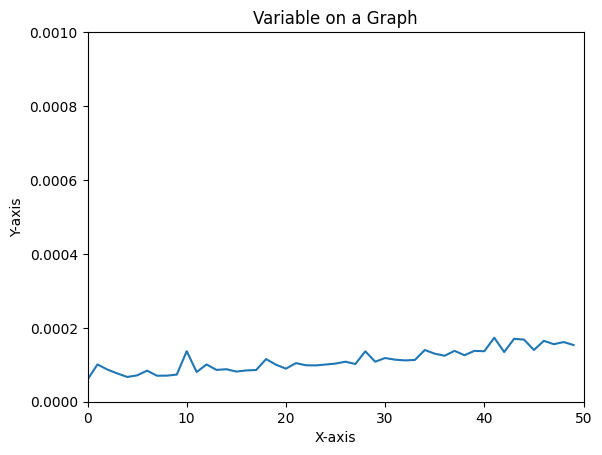

time: 2.07 s (started: 2023-05-27 09:59:27 +00:00)


In [ ]:
import time
import matplotlib.pyplot as plt

# Initialize empty lists for x and y coordinates
x = []
y = []

# Create a figure and axis
fig, ax = plt.subplots()

# Set up the plot (optional)
ax.set_xlim(0, 50)
ax.set_ylim(0, 0.001)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Variable on a Graph')

# Create a line object
line, = ax.plot(x, y)

# Update the graph function
def update_graph(new_x, new_y):
    x.append(new_x)
    y.append(new_y)
    line.set_data(x, y)
    ax.relim()
    ax.autoscale_view()
    fig.canvas.draw()

def print_table():
    # Print the table heading
    print("{:<15s}{:<15s}{:<15s}".format("# Iteration", "Brute Force", "Greedy"))

    n = 6  # Number of nodes
    m = 9  # Number of edges

    bf_Data = 0
    greedy_Data = 0

    total_time_BF = 0.0
    total_time_G = 0.0
    z = 50
    for j in range(z):
        V, E = generate_random_graph(n, m)

        # Measure the execution time for greedyDS
        start_time_G = time.time()
        dominating_setG = greedyDS(V, E)
        end_time_G = time.time()
        elapsed_time_G = end_time_G - start_time_G

        if j % 3 == 0:
            n = n + 1
            m = m + 1

        new_x = j
        new_y = elapsed_time_G
        update_graph(new_x, new_y)

        print(j, "th time for greedyDS: {} seconds".format(elapsed_time_G))

    # Display the graph after all iterations
    plt.show()

print_table()
